Drawing the corner from numpy.rec file. The benefit is that variable name is in file. Burnin is already applied.

In [2]:
import numpy as np
import corner
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
result = np.load('./np_2.npy')
array_2d = result.view((np.float64, len(result.dtype.names)))

In [3]:
result = np.load('./np_h.npy')
array_2d_h = result.view((np.float64, len(result.dtype.names)))

/tmp/ipykernel_290685/1969618069.py:2: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  array_2d_h = result.view((np.float64, len(result.dtype.names)))


In [3]:
import seaborn as sns

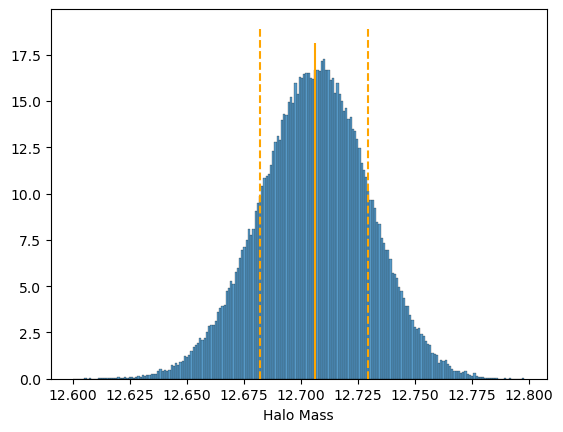

[12.68205031 12.70626872 12.72947819]


In [12]:
axes = sns.histplot(array_2d, stat='density')
axes.set_ylabel('')
axes.set_xlabel('Halo Mass')
axes.vlines(np.percentile(array_2d, 50), *axes.get_ylim(), linestyle='-', color='orange')
axes.vlines(np.percentile(array_2d, [50 - 34.1, 50 + 34.1]), *axes.get_ylim(), linestyle='--', color='orange')
plt.show()

print(np.percentile(array_2d, [50 - 34.1, 50, 50 + 34.1]))

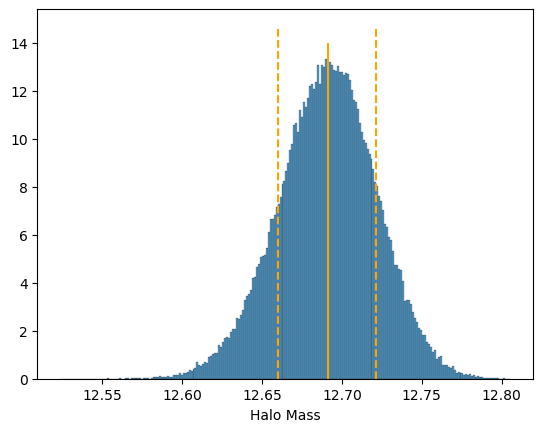

[12.66029248 12.69148249 12.72129667]


In [8]:
axes = sns.histplot(array_2d_h, stat='density')
axes.set_ylabel('')
axes.set_xlabel('Halo Mass')
axes.vlines(np.percentile(array_2d_h, 50), *axes.get_ylim(), linestyle='-', color='orange')
axes.vlines(np.percentile(array_2d_h, [50 - 34.1, 50 + 34.1]), *axes.get_ylim(), linestyle='--', color='orange')
plt.show()

print(np.percentile(array_2d_h, [50 - 34.1, 50, 50 + 34.1]))

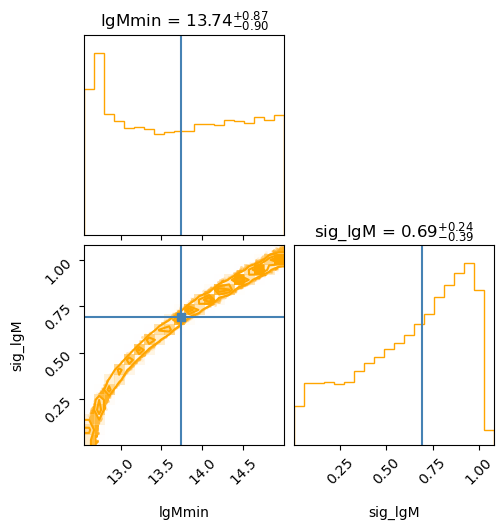

In [4]:
fig = corner.corner(array_2d, labels=result.dtype.names, show_titles=True, color='orange', truths=np.percentile(array_2d, 50, axis=0))
# This will not work for 1-d mcmc; just use sns.histplot to plot it.

In [13]:
from read_files import *
from calc_wp import w_p

In [15]:
wp_table = read_wp('../wp_table')
rp, signal = read_signal('../signal/signal.npy')
cov = read_cov('../signal/cov.npy')
cov_inv = np.linalg.inv(cov)
logM, Nh = read_halo_mass_function('../halo_mass_function.npy')

sep_min = 0.1
sep_max = 100
sep_N = 30
r_pbins = np.geomspace(sep_min, sep_max, sep_N+1)

rp0 = (r_pbins[1:]*r_pbins[:-1])**0.5
interpolate_table(wp_table, rp, rp0)

In [16]:
from run_mcmc import HODParameter

In [17]:
para = HODParameter()
read_config('./config_fix_sig.yaml', para)

{'Nwalkers': 40,
 'Nstep': 8000,
 'Nburnin': 800,
 'Npro': 40,
 'backend_file': None,
 'numpy_file': 'np_fix',
 'wp_table_path': '../wp_table',
 'signal_path': '../signal'}

In [18]:
predict = w_p(logM, Nh, para.full_parameters(np.atleast_1d(np.percentile(array_2d, 50))), wp_table)

In [19]:
n = len(rp)
auto = signal[:n]
cross = signal[n:]
auto_err = np.sqrt([cov[i,i] for i in range(n)])
cross_err = np.sqrt([cov[i,i] for i in range(n, n*2)])

In [20]:
para.full_parameters(np.atleast_1d(np.percentile(array_2d, 50)))

parameter(lgMmin=12.706268721611645, sig_lgM=0.2, lgM0=12.0, lgM1p=12.0, alpha=1.0)

In [24]:
rp

array([ 3.37197138,  4.25999539,  5.38188457,  6.79922837,  8.58983612,
       10.85200857, 13.70993443, 17.32050808, 21.88194273, 27.64465197,
       34.92499691, 44.12265385, 55.74255561, 70.4226114 , 88.96872671])

In [27]:
((predict[:n] - auto)**2/auto_err**2).sum()

36.92686675814488

In [26]:
((predict[:n] - auto)**2/auto_err**2)

array([ 0.04369269,  0.06952965,  0.29253147,  0.68475402,  1.37737862,
        0.40486111,  0.10586378,  1.04443562,  1.32293949,  0.474946  ,
        4.63056496,  3.28498739,  1.70881948,  5.91648442, 15.56507807])

[]

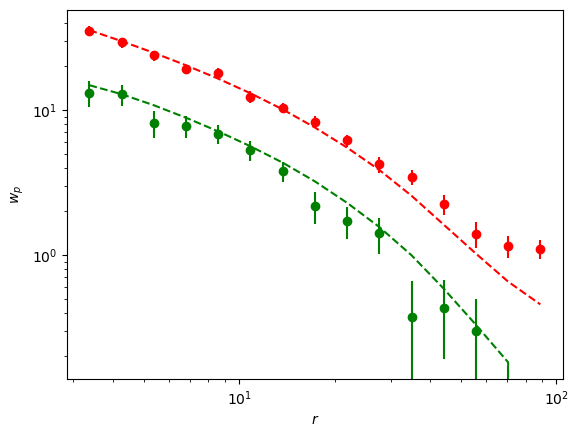

In [22]:
plt.errorbar(rp, auto, auto_err, fmt='ro')
plt.errorbar(rp, cross, cross_err, fmt='go')
plt.plot(rp, predict[:n], 'r--')
plt.plot(rp, predict[n:], 'g--')
plt.xlabel('$r$')
plt.ylabel('$w_p$')
plt.loglog()

In [23]:
para.ln_prob(np.atleast_1d(np.percentile(array_2d, 50)))

NameError: name 'logM' is not defined

In [5]:
rp, signal_h = read_signal('../signal_high.npy')
rp, signal_l = read_signal('../signal_low.npy')

In [8]:
delta_w = signal_l[:len(signal_l)//2] - signal_h[:len(signal_l)//2]

In [ ]:
plt.plot()

[]

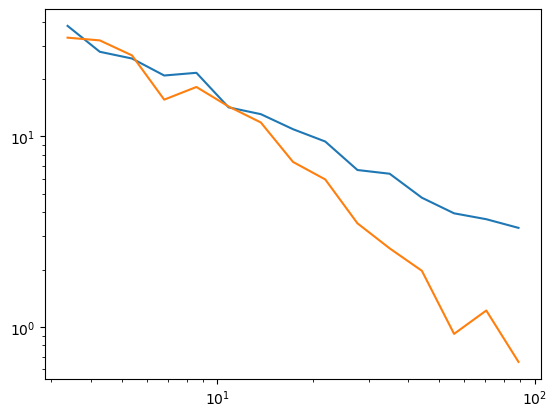

In [10]:
plt.plot(rp, signal_l[:len(signal_l)//2])
plt.plot(rp, signal_h[:len(signal_l)//2])
plt.loglog()

[]

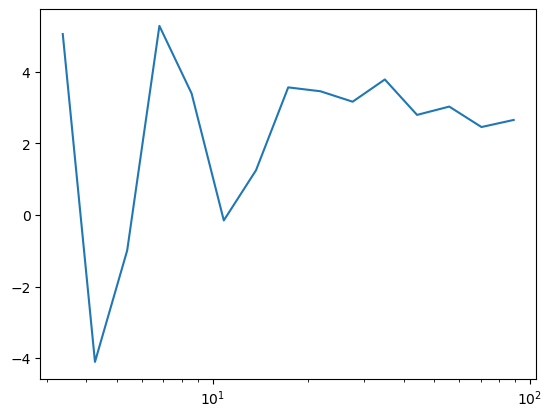

In [9]:
plt.plot(rp, delta_w)
plt.semilogx()